# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [34]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [35]:
df = pd.read_csv('sentencing_asof0405.csv')

<ipython-input-35-20de55b37101>:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sentencing_asof0405.csv')


## 0.2: Print head, dimensions, info (0 points)

In [36]:
df.head()
df.shape
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [37]:
print(df[["CASE_ID","CASE_PARTICIPANT_ID","CHARGE_ID"]].nunique())


CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64


Why there are more unique people than unique cases? Each case can have multiple people, such as if there were two people stealing a car together. 

In [38]:
#Examples of cases involving multiple people 

df.CASE_ID.value_counts() #Find a case that has multiple rows associated with it
CASE_ID_181880245351 = df.loc[df['CASE_ID'] == 181880245351] #dataframe of 124 rows with this case_id 
CASE_ID_181880245351.CASE_PARTICIPANT_ID.value_counts() #List each of the participants associated with case ID 181880245351

CASE_ID
181880245351    124
210642026541     92
213788534740     74
401360132899     59
213254130589     57
               ... 
399442651449      1
399443532577      1
399444119996      1
399444266850      1
445593200623      1
Name: count, Length: 197519, dtype: int64

CASE_PARTICIPANT_ID
179640159105    99
179640253478    13
180263204488    10
179640347850     2
Name: count, dtype: int64

Why there are more unique charges than unique people? People may have more than one charge. 

In [39]:
df.CASE_PARTICIPANT_ID.value_counts() #look for participants that come up in multiple rows

#create sub dataframe that's only participant ID 179640159105
CASE_PARTICIPANT_ID_179640159105 = df.loc[df.CASE_PARTICIPANT_ID == 179640159105] 
CASE_PARTICIPANT_ID_179640159105 #count charge IDs for a given participant ID

CASE_PARTICIPANT_ID
179640159105    99
202888754974    81
204215911473    74
764908059450    59
213339345634    54
                ..
762800916570     1
762801105314     1
704484642642     1
762801294059     1
905535215556     1
Name: count, Length: 211977, dtype: int64

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
266,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240855975,346314890356,MURDER/OTHER FORCIBLE FELONY,2,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
267,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240906251,346314329833,MURDER/OTHER FORCIBLE FELONY,3,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
268,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240956527,346312741683,MURDER/OTHER FORCIBLE FELONY,4,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
269,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69241006802,346312835104,MURDER/OTHER FORCIBLE FELONY,5,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
270,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69241057078,346312928524,MURDER/OTHER FORCIBLE FELONY,6,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390175033,145107173331,AGG KIDNAPING ARMED W/FIREARM,94,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
361,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390225309,145106893070,AGG KIDNAPING ARMED W/FIREARM,95,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
362,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390275585,145107453593,AGG KIDNAPING ARMED W/FIREARM,96,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
363,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390325860,145107547014,AGG KIDNAPING ARMED W/FIREARM,97,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion


Print the mean and median number of charges per case/participant. Print the mean and median number of participants per case. 

In [40]:
print("Charges per case: ")
print(df.groupby("CASE_ID")["CHARGE_ID"].nunique().agg(["mean","median"]))

print("Charges per participant: ")
print(df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique().agg(["mean","median"]))

print("Participants per case: ")
print(df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().agg(["mean","median"]))


Charges per case: 
mean      1.159458
median    1.000000
Name: CHARGE_ID, dtype: float64
Charges per participant: 
mean      1.126146
median    1.000000
Name: CHARGE_ID, dtype: float64
Participants per case: 
mean      1.073198
median    1.000000
Name: CASE_PARTICIPANT_ID, dtype: float64


In [41]:
df.shape

(248146, 41)

Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


No, the data does not seem to enable us to follow the same defendant across different cases because a given case_participant_id can have multiple charge_ids, and we see in the data documentation that case_participant_id = Internal unique identifier for each defendant **associated with a case**. 

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


First, read the data documentation link and summarize in your own words the differences between OFFENSE_CATEGORY and UPDATED_OFFENSE_CATEGORY. 

OFFENSE_CATEGORY is determined before specific charges are filed, while UPDATED_OFFENSE_CATEGORY is based on the primary charge for the case. As a case evolves and the primary charge is filed, the case may or may not have a different UPDATED_OFFENSE_CATEGORY. 

Construct an indicator is_changed_offense that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

In [42]:
#is_changed_offense == True 
#for each row where there's a different between OFFENSE_CATEGORY and UPDATED_OFFENSE_CATEGORY

df["is_changed_offense"] = df["OFFENSE_CATEGORY"] != df["UPDATED_OFFENSE_CATEGORY"]
changed_offenses = df.loc[df['is_changed_offense'] == True]
changed_offenses.OFFENSE_CATEGORY.value_counts().index[1]


'DUI'

DUIs are a common changed offense, with 3,896 instances where there was a difference between the original charge (offense category) and the most current charge (updated offense category). This may be changed due to legal negotiations, and defense attorneys might be able to modify the offense. DUI also may not be the primary charge, if an intoxicated driver also drove into a pedestrian (for example), their primary charge may be involuntary manslaughter.

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [43]:
df['simplified_offense_derived'] = df.UPDATED_OFFENSE_CATEGORY.str.replace("Aggravated ","")

conditions = [df.simplified_offense_derived.str.contains(x) for x in ["Arson", "Homicide","Vehic","Battery"]]
categories = ["Arson", "Homicide", "Vehicle-related", "Battery"]

df.simplified_offense_derived = np.select(conditions, categories, default=df.UPDATED_OFFENSE_CATEGORY)
print(df.UPDATED_OFFENSE_CATEGORY.nunique()- df.simplified_offense_derived.nunique())

11


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [44]:
#Clean race
df['is_black_derived'] = df.RACE.isin(['Black','White/Black [Hispanic or Latino]']).fillna(False)
df['is_hisp_derived'] = df.RACE.isin(['White [Hispanic or Latino]','HISPANIC']).fillna(False)
df['is_white_derived'] = df.RACE.isin(['White']).fillna(False)
df['is_othereth_derived'] = ~ (df.is_black_derived | df.is_hisp_derived | df.is_white_derived).fillna(False)

In [45]:
#Clean gender: create a boolean true/false indicator for is_male_derived (false is female, unknown, or other)
df["is_male_derived"] = df.GENDER.fillna(False) == "Male"                                                    

In [46]:
#Clean age
percentile_9999 = np.percentile(df.AGE_AT_INCIDENT.dropna(), 99.99)
df['age_derived'] = df['AGE_AT_INCIDENT']
df.loc[df.AGE_AT_INCIDENT > percentile_9999, 'age_derived'] = percentile_9999

Create sentenceymd_derived that's a version of SENTENCING_DATE converted to datetime format.

Also create a rounded version, sentenceym_derived,  that's rounded down to the first of the month and the year 
(e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)

Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within pd.to_datetime() to allow the conversion to proceed.

In [47]:
#Clean date
parts = df.SENTENCE_DATE.str.split('/', expand=True)
year_str = parts[2].str[:4]

year_int = year_str.astype(int)

#Retranscribe the wrong dates (eg. 2914, 2029)
year_str[(year_int >= 2100)] = "20" + year_str[(year_int >= 2100)].str[2:]
year_str[(year_int > 2021) & (year_int < 2100)] = "200" + year_str[(year_int > 2021) & (year_int < 2100)].str[3:]

df.SENTENCE_DATE = parts[0] + "/" + parts[1].str[:2] + "/" + year_str + " 12:00:00 AM"

df["sentenceymd_derived"] = pd.to_datetime(df.SENTENCE_DATE, format = "%m/%d/%Y %I:%M:%S %p")
df["sentenceym_derived"] = df.sentenceymd_derived.dt.to_period("M").dt.to_timestamp()

Sentencing judge: create an identifier (judgeid_derived) for each unique judge (SENTENCE_JUDGE) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name).

Hint: due to mixed types, you may need to cast the SENTENCE_JUDGE var to a diff type to sort

In [48]:
#Clean judge
df.SENTENCE_JUDGE = df['SENTENCE_JUDGE'].astype(str)
df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].apply(lambda x: "Shelley Sutker-Dermer" if ~pd.isna(x) and "Shelley" in x and "Sutker" in x else x)
df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].apply(lambda x: "Douglas J Simpson" if ~pd.isna(x) and "Doug" in x and "Simpson" in x else x)

df["judgeid_derived"] = df.SENTENCE_JUDGE.astype(str)

unique_judges = sorted(df.judgeid_derived.unique())
judgeid = ["judge_" + str(i + 1) for i in range(len(unique_judges))]

judgeid_mapping = dict(zip(unique_judges, judgeid))

df.judgeid_derived = df.judgeid_derived.map(judgeid_mapping)

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [49]:
# check
df[["RACE", "is_black_derived", "is_hisp_derived", "is_white_derived", "is_othereth_derived",
    "GENDER", "is_male_derived",
    "AGE_AT_INCIDENT", "age_derived",
    "SENTENCE_DATE", "sentenceymd_derived", "sentenceym_derived",
    "SENTENCE_JUDGE", "judgeid_derived"]].sample(n = 10)

,RACE,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived,GENDER,is_male_derived,AGE_AT_INCIDENT,age_derived,SENTENCE_DATE,sentenceymd_derived,sentenceym_derived,SENTENCE_JUDGE,judgeid_derived
80658,Black,True,False,False,False,Male,True,54.0,54.0,4/18/2013 12:00:00 AM,2013-04-18,2013-04-01,Neil J Linehan,judge_235
65472,White [Hispanic or Latino],False,True,False,False,Female,False,35.0,35.0,9/7/2012 12:00:00 AM,2012-09-07,2012-09-01,Lawrence Edward Flood,judge_179
243009,Black,True,False,False,False,Male,True,29.0,29.0,12/11/2019 12:00:00 AM,2019-12-11,2019-12-01,Geraldine A D'Souza,judge_93
236962,Black,True,False,False,False,Male,True,31.0,31.0,7/17/2019 12:00:00 AM,2019-07-17,2019-07-01,Catherine Marie Haberkorn,judge_36
54711,Black,True,False,False,False,Male,True,20.0,20.0,4/24/2012 12:00:00 AM,2012-04-24,2012-04-01,Raymond Myles,judge_256
89040,Black,True,False,False,False,Male,True,53.0,53.0,12/5/2013 12:00:00 AM,2013-12-05,2013-12-01,Larry G Axelrood,judge_175
197488,Black,True,False,False,False,Male,True,28.0,28.0,6/23/2017 12:00:00 AM,2017-06-23,2017-06-01,Alfredo Maldonado,judge_5
237568,White [Hispanic or Latino],False,True,False,False,Female,False,19.0,19.0,12/14/2020 12:00:00 AM,2020-12-14,2020-12-01,Timothy J Chambers,judge_314
169394,Black,True,False,False,False,Male,True,23.0,23.0,5/9/2016 12:00:00 AM,2016-05-09,2016-05-01,Allen F Murphy,judge_6
7155,Black,True,False,False,False,Male,True,17.0,17.0,5/11/2011 12:00:00 AM,2011-05-11,2011-05-01,Luciano Panici,judge_189


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [50]:
# subset to cases with one participant
participants_per_case = df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique()

df = df[df.CASE_ID.isin(participants_per_case[participants_per_case == 1].index)]

# subset to a participant-level dataset
df = df[(df.PRIMARY_CHARGE_FLAG == True) & (df.CURRENT_SENTENCE_FLAG == True)]

print(df.groupby(["CASE_ID", "CASE_PARTICIPANT_ID"]).size().max() <= 1) # only one charge per participant if true

# filter out invalid judges
df = df[~ df.SENTENCE_JUDGE.isnull() & (df.SENTENCE_JUDGE != "FLOOD")] #not null and not equal to "FLOOD"

# subset sentencing date
df = df[(df.sentenceymd_derived >= "2012-01-01") & (df.sentenceymd_derived <= "2021-04-05")]

print(len(df))

True
135606


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [51]:
df_c = pd.read_pickle('sentencing_cleaned.pkl')

## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [52]:

def_by_race = df_c.groupby(["sentenceym_derived"]).agg(     
    unique_cases = ("CASE_ID", "nunique"),
    black_def = ("is_black_derived", "sum"),
    white_def = ("is_white_derived", "sum"))

def_by_race["black_prop"] = def_by_race.black_def / def_by_race.unique_cases   #black defendants/total cases per month
def_by_race["white_prop"] = def_by_race.white_def / def_by_race.unique_cases   #white defendants/total cases per month

def_by_race


,unique_cases,black_def,white_def,black_prop,white_prop
sentenceym_derived,,,,,
2012-01-01,1674,1134,242,0.677419,0.144564
2012-02-01,1450,941,233,0.648966,0.160690
2012-03-01,1612,1030,255,0.638958,0.158189
2012-04-01,1436,1000,211,0.696379,0.146936
2012-05-01,1545,1074,223,0.695146,0.144337
...,...,...,...,...,...
2020-11-01,491,298,76,0.606925,0.154786
2020-12-01,537,347,85,0.646182,0.158287
2021-01-01,447,278,50,0.621924,0.111857


Text(0.5, 0, 'Date (Month-Year)')

Text(0, 0.5, 'proportion of defendants')

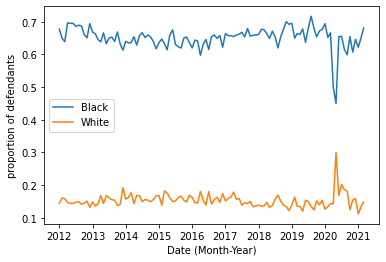

In [53]:
# plot proportion of White vs. Black defendants over time
plt.plot(def_by_race.index, def_by_race["black_prop"], label = "Black")
plt.plot(def_by_race.index, def_by_race["white_prop"], label = "White")

plt.xlabel("Date (Month-Year)")
plt.ylabel("proportion of defendants")
plt.legend()

plt.show()

$$ P_{\text{black}} = \frac{\sum \text{black\_defendants}}{\sum \text{unique\_cases}} $$
​
$$ P_{\text{white}} = \frac{\sum \text{white\_defendants}}{\sum \text{unique\_cases}} $$

The proportion of white defendants skyrockets in April and May of 2020.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

Text(0.5, 0, 'date')

Text(0, 0.5, 'disparity in incarceration proportion (Black - White)')

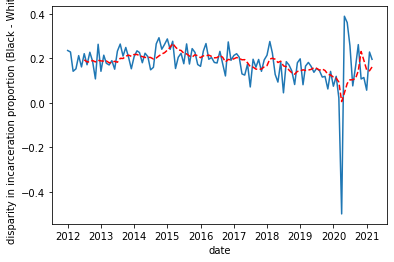

In [54]:
df_incar = df_c[df_c.COMMITMENT_TYPE == "Illinois Department of Corrections"]

total_by_race = df_c.groupby(["sentenceym_derived"])[["is_black_derived", "is_white_derived"]].sum()
incar_by_race = df_incar.groupby(["sentenceym_derived"])[["is_black_derived", "is_white_derived"]].sum()

black_incar_prop = incar_by_race.is_black_derived / total_by_race.is_black_derived
white_incar_prop = incar_by_race.is_white_derived / total_by_race.is_white_derived

incar_diff = black_incar_prop - white_incar_prop

# plot disparity in incarceration proportion over time
plt.plot(incar_diff.index, incar_diff)

smoothed_line = incar_diff.rolling(window = 7).mean()
plt.plot(incar_diff.index, smoothed_line, color = "red", linestyle = "--")

plt.xlabel("date")
plt.ylabel("disparity in incarceration proportion (Black - White)")

plt.show()

Black defendants are more likely to get incarcerated (smoothed line consistently greater than 0). The disparities between the incarceration proportion of black defendants and the incarceration proportion of white defendants remains relatively stable but widens a bit over 2019-2021. There is a sharp decrease in early 2020 followed by an uptick. 

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [55]:
top_black_offenses = df_c[df_c.is_black_derived]["simplified_offense_derived"].value_counts().head(10).index.tolist()
top_white_offenses = df_c[df_c.is_white_derived]["simplified_offense_derived"].value_counts().head(10).index.tolist()

frequent_offenses = top_black_offenses + [off for off in top_white_offenses if off not in top_black_offenses]

### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [56]:
df_incar_by_off = pd.DataFrame(index = frequent_offenses)

for off in frequent_offenses:
    black_incar_rate = df_incar[df_incar.simplified_offense_derived == off].is_black_derived.mean()
    white_incar_rate = df_incar[df_incar.simplified_offense_derived == off].is_white_derived.mean()
    df_incar_by_off.loc[off, "black_incar_rate"] = black_incar_rate
    df_incar_by_off.loc[off, "white_incar_rate"] = white_incar_rate

df_incar_by_off

,black_incar_rate,white_incar_rate
Narcotics,0.854838,0.064433
UUW - Unlawful Use of Weapon,0.829901,0.031514
Retail Theft,0.709689,0.197272
Battery,0.726742,0.122505
Driving With Suspended Or Revoked License,0.620162,0.137602
DUI,0.420313,0.184225
Burglary,0.654006,0.202653
Theft,0.653574,0.224726
Vehicle-related,0.736288,0.117452
Robbery,0.792835,0.068536


Narcotics, UUW, and robbery show the largest Black-White disparities, with Black defendants significantly more likely to get sentenced to incarceration for those offenses.

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


,pre_disparity,post_disparity
2,0.087912,0.118622
4,0.081588,0.034002
8,0.1329,0.065082
12,0.161618,0.06831


<Axes: >

<Axes: >

Text(0.5, 0, 'bandwidth (months)')

Text(0, 0.5, 'disparity in incarceration rate (Black - White)')

(-0.5, 3.5)

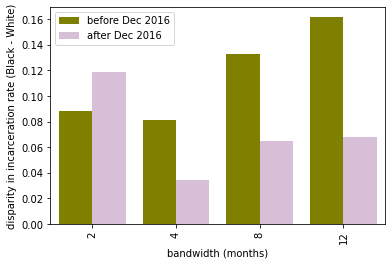

In [57]:
# function returning the incarceration disparities before and after Dec 2016
def calculate_disparity(df, offense, bandwidth):
    change_date = pd.to_datetime("2016-12-01")
    
    start_date = change_date - pd.DateOffset(months = bandwidth)
    end_date = change_date + pd.DateOffset(months = (bandwidth + 1))
    
    pre_change = df[(df.simplified_offense_derived == offense) & 
                    (df.sentenceym_derived >= start_date) & 
                    (df.sentenceym_derived < change_date)]
    
    post_change = df[(df.simplified_offense_derived == offense) & 
                     (df.sentenceym_derived > change_date) & 
                     (df.sentenceym_derived <= end_date)]
    
    #pre-change incarceration proportions
    pre_black_incar_charged = pre_change[(pre_change.COMMITMENT_TYPE == "Illinois Department of Corrections") & (pre_change.is_black_derived == True)].shape[0]
    pre_black_charged = pre_change[pre_change.is_black_derived == True].shape[0]
    
    pre_white_incar_charged = pre_change[(pre_change.COMMITMENT_TYPE == "Illinois Department of Corrections") & (pre_change.is_white_derived == True)].shape[0]
    pre_white_charged = pre_change[pre_change.is_white_derived == True].shape[0]
    
    #pre-change difference between black and white
    pre_disparity =  (pre_black_incar_charged/pre_black_charged) - (pre_white_incar_charged/pre_white_charged)
    
    #post-change incarceration proportions
    post_black_incar_charged = post_change[(post_change.COMMITMENT_TYPE == "Illinois Department of Corrections") & (post_change.is_black_derived == True)].shape[0]
    post_black_charged = post_change[post_change.is_black_derived == True].shape[0]
    
    post_white_incar_charged = post_change[(post_change.COMMITMENT_TYPE == "Illinois Department of Corrections") & (post_change.is_white_derived == True)].shape[0]
    post_white_charged = post_change[post_change.is_white_derived == True].shape[0]
    
    #post-change incarceration proportions
    post_disparity =  (post_black_incar_charged/post_black_charged) - (post_white_incar_charged/post_white_charged)
    
    return pre_disparity, post_disparity

# create a disparities dataframe
bandwidths = [2, 4, 8, 12]
df_disparities = pd.DataFrame(index = bandwidths, columns = ["pre_disparity", "post_disparity"])

for b in bandwidths:
    pre_disparity, post_disparity = calculate_disparity(df_c, "Retail Theft", b)
    df_disparities.loc[b] = [pre_disparity, post_disparity]

df_disparities

# bar chart for Black-White disparities pre and post change
df_disparities.pre_disparity.plot(kind = "bar", color = "olive", width = 0.4, position = 1, label = "before Dec 2016")
df_disparities.post_disparity.plot(kind = "bar", color = "thistle", width = 0.4, position = 0, label = "after Dec 2016")

plt.xlabel("bandwidth (months)")
plt.ylabel("disparity in incarceration rate (Black - White)")
plt.xlim(- 0.5, len(df_disparities) - 0.5)
plt.legend()

plt.show()

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

In the bandwidth immediately following the policy change (2-month bandwidth), the disparities were actually higher after the policy but, more long term, we see disparities decreasing after the policy went into effect. The short-term effects would support those who argued that the change may widen disparities, but the longer-term effects would support those who argued that the change would narrow disparities.